# Part I - (San Francisco FordGo Bikeshare Analysis)
## by (Christabel Uzor)

## Introduction
Bike sharing is a form of transportation that is easy to use, enjoyable and convenient. it involves a number of bikes parked at different locations where people can rent a bike by unlocking it with an app and returning after use to any bike station around the city. Unlocked bikes can be returned to any other station in the system, even if they were originally rented from a different station. People use bike sharing for many different reasons, such as commuting to work or school, running errands, and getting to and from appointments. There are about 183,412 records and 16 features in the bike share 2019 records dataset used for this project. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading in the fordgobike share dataset into a pandas dataframe named bikeshare
bikeshare = pd.read_csv('201902-fordgobike-tripdata.csv')
#printing just the first five columns of the dataset
bikeshare.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#printing the shape and content of the dataset to have an overview of the dataset
print(bikeshare.shape)
print(bikeshare.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#using the .info() function to have more insight about the dataset
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
#using the .isnull() function to check for columns that have null values
bikeshare.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#using the .duplicated() function to check for duplicated values
bikeshare.duplicated().sum()

0

In [7]:
#using .describe function to know the statistics of the dataset
bikeshare.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#checking the unique values of the member_gender column
bikeshare.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
#checking the unique values of the type of users in the dataset
bikeshare.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
bikeshare.member_birth_year.unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,
        1902.,  1910.,  1938.,  1927.])

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of my interest are;

<ul>
    <li> user_type </li>
    <li>gender</li>
    <li>duration</li>
    <li>member age</li>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_station_name, bike_id, end_station_name, usertype, start_time, end_time, member_birth_year, member_gender, duration, start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.

## My Observations from the Preliminary Wrangling
I observed that some columns have the wrong datatypes as well as some columns having 'Nan' values in them. Hence, I'd do some cleaning before I proceed to the exploration phase.


In [11]:
#copying my dataset for cleaning
clean_bikeshare = bikeshare.copy()

**Issues I think should be cleaned**

1. The start_time and end_time column datatype should be changed to datetime datatype
2. The start_time column should be splitted into hour, day, month and year.
3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype.
5. Calculate the members age by their birth_year information provided.

## Data Cleaning or Preparation Phase

In [12]:
#1. The start_time and end_time column datatype should be changed to datetime datatype
clean_bikeshare['start_time'] = pd.to_datetime(clean_bikeshare['start_time'])
clean_bikeshare['end_time'] = pd.to_datetime(clean_bikeshare['end_time'])

In [13]:
#2. The start_time column should be splitted into hour, day, month and year
clean_bikeshare['start_month_name']=clean_bikeshare['start_time'].dt.strftime('%B')
clean_bikeshare['start_month']=clean_bikeshare['start_time'].dt.month.astype(int)
clean_bikeshare['start_week']=clean_bikeshare['start_time'].dt.strftime('%a')
clean_bikeshare['start_day']=clean_bikeshare['start_time'].dt.day.astype(int)
clean_bikeshare['start_hour']=clean_bikeshare['start_time'].dt.hour

In [14]:
#3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('category')

In [15]:
#4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype
for col in ['bike_id', 'start_station_id', 'end_station_id']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('object')

In [16]:
#5. Calculate the members age by their birth_year information provided
clean_bikeshare['Age'] = 2019 - clean_bikeshare['member_birth_year']

In [17]:
# printing to check the changes implemented
clean_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
start_month_name           183412 non-null object
start_month  

From the above, we can see that the necessary cleaning has been done. Now, I move to the exploration phase

## Univariate Exploration

Below, I'd be looking at the univariate plots of some interested variables

**Question:** What are the ages of the members that use the FordGo Bikeshare services more?

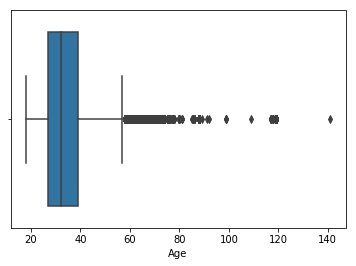

In [18]:
#1. The age of the members
sb.boxplot(data=clean_bikeshare, x='Age')

**Observation:** From the boxplot above, I observed that the ages of the members are below 60. Therefore, for a clearer view, I'd remove the members with ages greater than 60.

In [19]:
#2. remove members ages > 60
clean_bikeshare = clean_bikeshare.query('Age < 60')
print(clean_bikeshare.Age.unique())

[ 35.  47.  30.  45.  36.  31.  27.  23.  26.  29.  38.  44.  41.  28.  22.
  33.  19.  37.  24.  39.  46.  34.  48.  40.  52.  21.  25.  42.  20.  32.
  50.  56.  43.  55.  54.  58.  51.  53.  57.  59.  49.  18.]


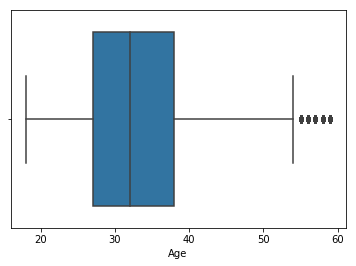

In [20]:
#re-plotting the members age boxplot
sb.boxplot(data=clean_bikeshare, x='Age')

**Question:** What gender uses the bikeshare service more?

In [21]:
#storing the days of the week in 'day_order'
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [22]:
#A user-defined function to plot countplot
def countplot (df, column, order=None, color=None):
    plt.figure(figsize=[10,6])
    sb.countplot(data = df, x=column, color = color, order=order);
    plt.title(f'''Distribution of {column}'''.title(), fontsize=14, weight ='bold')
    plt.xlabel(column.title(),fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10,weight='bold')

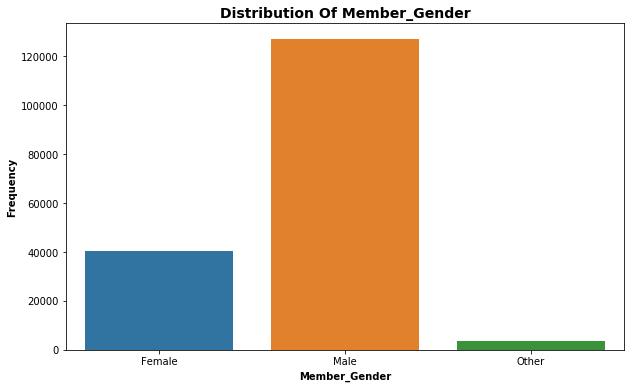

In [23]:
#3. calling plot function for gender distribution
countplot(clean_bikeshare,'member_gender')

**Observation:** From the distribution of member chart above, we can see that the male gender tends to use the bikeshare service more than the female gender.
<br> </br>
<br> </br>


**Question:** What hours of the day have the highest number of trips?

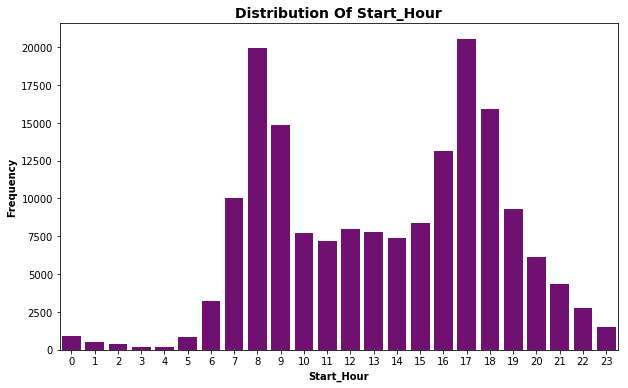

In [24]:
#4. calling plot function for distribution of trips per start_hour
countplot(clean_bikeshare,'start_hour', color='purple')

**Observation:** In the distribution of start hour chart above, it is observed that the highest trips happens to be around 8 am in the morning and 5pm (17) in the evening.
This observation is very realistic, since people go to work early in the morning at about 8am and returns around 5pm in the evening.
I also observed that 3am in the morning has the lowest trip to occur probably because people are sleeping at that time. 
<br> </br>
<br> </br>

**Question:** What days of the week have the highest number of trips?

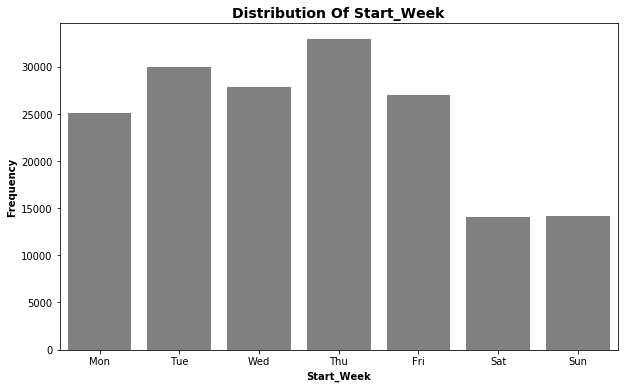

In [25]:
#5. calling plot function for the distribution of trips per week day
countplot(clean_bikeshare,'start_week', color = 'grey', order=day_order)

**Observation**: In the chart above, it is observed that Thursday has the highest number of trips, followed by Tuesday, then wednesday.
While saturday and sunday seems to have expected reduction on trips, since most people will likely be at home for weekends.
<br> </br>
<br> </br>

**Question:** Which type of users use the bikeshare service more?

Subscriber    154618
Customer       16375
Name: user_type, dtype: int64


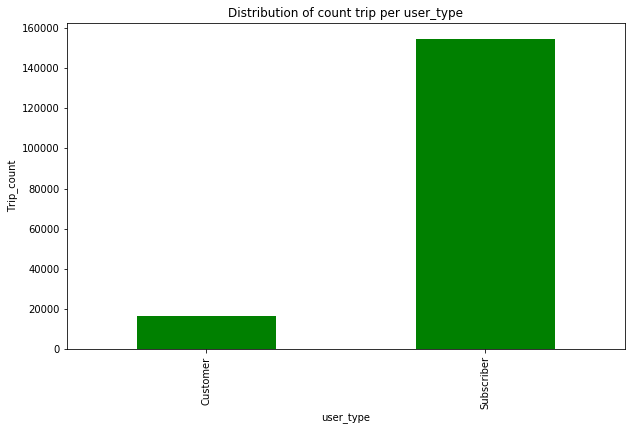

In [26]:
#6. Distribution of count trip per user_type
plt.figure(figsize = [10, 6])
print(clean_bikeshare['user_type'].value_counts())
ax = clean_bikeshare['user_type'].value_counts().sort_index()\
.plot(kind = 'bar',color ='green',\
      title = "Distribution of count trip per user_type")
ax.set_xlabel("user_type")
ax.set_ylabel("Trip_count")
plt.show()

**Observation:** From the chart above, it can be seen that subscriber users are more than the customers.
I will advice that the fordgobike share business owners should channel more of their marketing and advertisement to the subscribers.
<br> </br>
<br> </br>

**Question:** What is the longest duration of a bike ride?

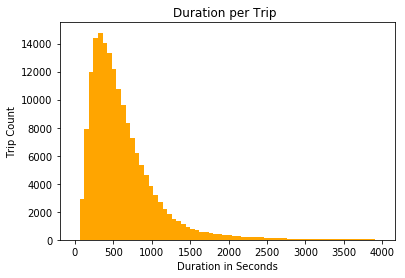

In [27]:
#7. Duration per trip
binz = np.arange(0, 4000, 60)

plt.hist(data = clean_bikeshare, x = 'duration_sec', bins = binz , color= "orange")
plt.title("Duration per Trip ")
plt.xlabel('Duration in Seconds')
plt.ylabel('Trip Count');

**Observation:** From the observation above, we can see that the longest trip happens in about 500 seconds, which when converted is 8 minutes.

Also, it can be observed that there were lesser trips when the duration is high, for example, when the duration is about 3500 secs which is about 58 minutes or let's say an hour. 
<p>So, I came to a conclusion that maybe people don't travel on a bike to a very far distance.</p>
<br> </br>
<br> </br>

**Question:** Which bike stations does users usually start their trips from and end their trips on?

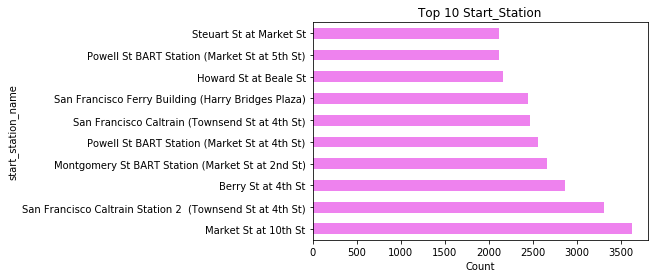

In [28]:
#8.Top ten start_station_name
ax = clean_bikeshare['start_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 Start_Station', color = 'violet')
ax.set_xlabel('Count')
ax.set_ylabel('start_station_name')
plt.show()

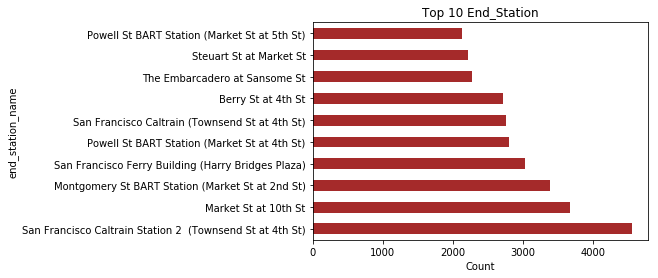

In [29]:
#9.Top ten end_station_name
ax = clean_bikeshare['end_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 End_Station', color = 'brown')
ax.set_xlabel('Count')
ax.set_ylabel('end_station_name')
plt.show()

**Observation:** From the two charts above, it can be observed that there are similaries betweeen the 'San Francisco Caltrain Station 2' and 'Market St at 10th St' start_station and end_station. A greater number of trips start and end in these two stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, for the Age, there were unusual points, so I had to do a transformation, because I noticed that the member age was less than 60, so i just used ages less than 60 so that the distributions can be clearer

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, for the start_time, I had to change the datatype, also. I had to split the data into the hour, weekday and month, so I could have a better insight.

## Bivariate Exploration


**Question:** Which gender go on longer trips?

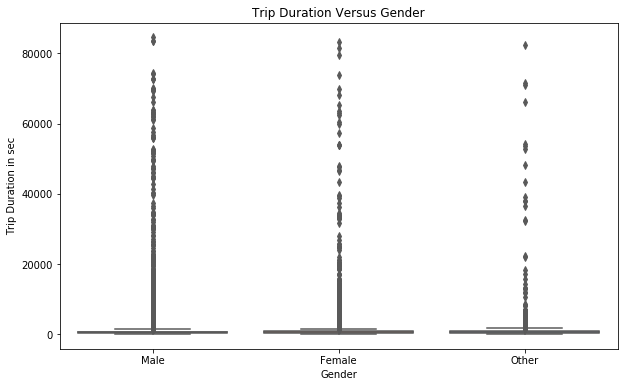

In [30]:
# 10. Trip Duration Versus Gender
plt.figure(figsize = [10, 6])
sb.boxplot(x='member_gender', y='duration_sec', data = clean_bikeshare, 
           order=['Male', 'Female', 'Other'],palette ='Set2')
plt.title('Trip Duration Versus Gender')
plt.xlabel('Gender')

plt.ylabel('Trip Duration in sec')
plt.show()

**Observation:** From the duration versus gender plot, we can see that the male gender covers more duration than the female gender and other gender types.
<br> </br>
<br> </br>

**Question:** Which type of users go on longer trips?

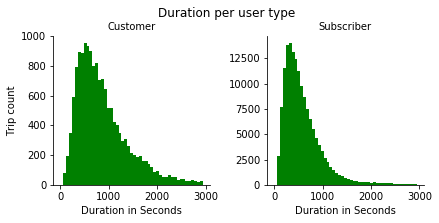

In [31]:
# 11.Duration per user_type
duration_user = sb.FacetGrid(clean_bikeshare, col="user_type", margin_titles=True,sharey = False)
binz = np.arange(0, 3000,60)
duration_user.map(plt.hist, "duration_sec",color="green", bins=binz)
duration_user.set_axis_labels("Duration in Seconds", "Trip count")
duration_user.set_titles(col_template = '{col_name}')
duration_user.fig.suptitle('Duration per user type', y=1.02);

**Observation:** The charts above shows that the customers have longer trip durations compared to the subscribers
<br> </br>
<br> </br>

**Question:** Which age of the users go on longer trips?

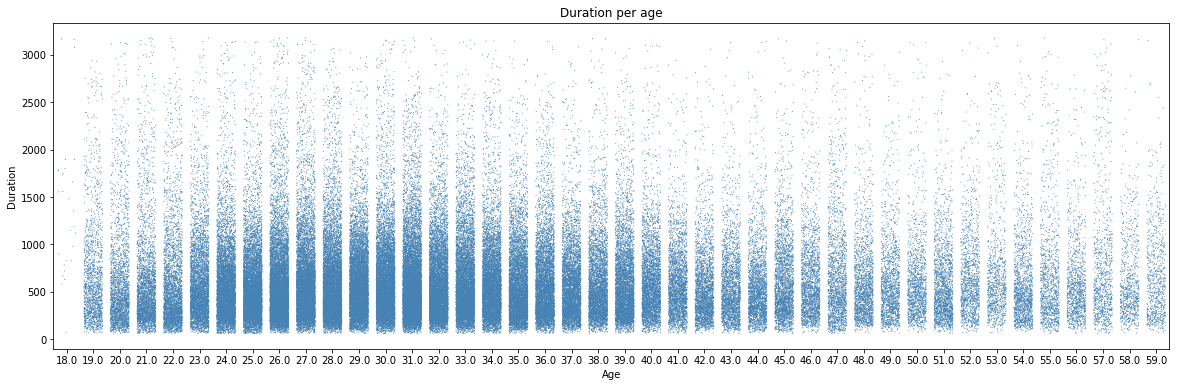

In [32]:
# 12.Duration per Age
plt.figure(figsize=(20,6))
sb.stripplot(data=clean_bikeshare.query('duration_sec<duration_sec.quantile(0.99)'), 
             x='Age', y='duration_sec', size=1,jitter=0.35, color='steelblue')
plt.title('Duration per age')
plt.xlabel('Age')
plt.ylabel('Duration');

**Observation:** At around age 20 to 40, the trip duration is higher than older ages.
<br> </br>
<br> </br>

**Question:** What is the distribution of age across the gender?

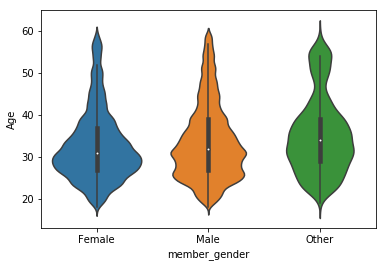

In [33]:
#13.Ages versus Gender
import seaborn as sns
#plt.style.use('ggplot')
#pd.set_option('max_columns',200)
sns.violinplot(x ='member_gender', 
                y = 'Age',
               data = clean_bikeshare)
plt.show()

**Observation:** The plots above shows that the ages of female users are about 20 to 50 years and males are about 20 to 60 years old. A greater number of females are within the ages of 25 and 35 while a greater number of males are within the ages of 25 and 40.

**Question:** Which age group and user type have the highest trip count?

In [34]:
# Here, I grouped the members age.
clean_bikeshare['age_group'] = clean_bikeshare['Age'].apply(lambda x: 'Teenager' if 12<x<=19
                                                  else 'Young Adult' if 19<x<=30
                                                  else 'Adult' if 30<x<=49
                                                  else 'Senior' if 49<x
                                                           else x)

In [35]:
clean_bikeshare.age_group.value_counts()

Adult          84522
Young Adult    72643
Senior         12116
Teenager        1712
Name: age_group, dtype: int64

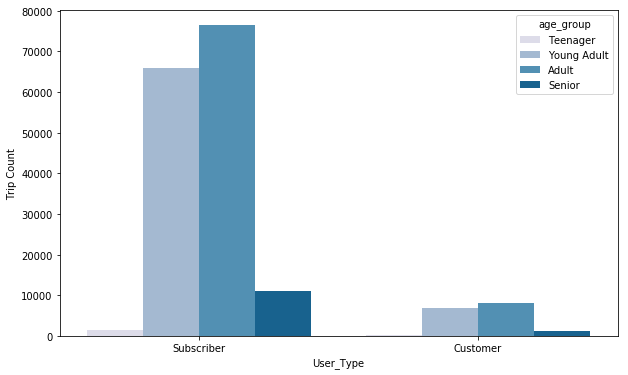

In [36]:
#14. Trip Count for each age group with their user type
plt.figure(figsize = [10, 6])
age_order=['Teenager','Young Adult', 'Adult', 'Senior']
age_chart = sb.countplot(data=clean_bikeshare, x="user_type", hue="age_group", hue_order=age_order, palette='PuBu', 
                          order=clean_bikeshare.user_type.value_counts().index)
age_chart.set_xlabel('User_Type')
age_chart.set_ylabel('Trip Count');

**Observation:** The adult subscribers have the highest trip count while the teenagers have the lowest trip count

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the male gender covers more duration than the female gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was able to observe that the customers goes on a longer duration of trips than the subscribers, meanwhile, the subscribers has the highest count of trips than the customers

## Multivariate Exploration


**Question:** What gender has longer trip durations on weekdays

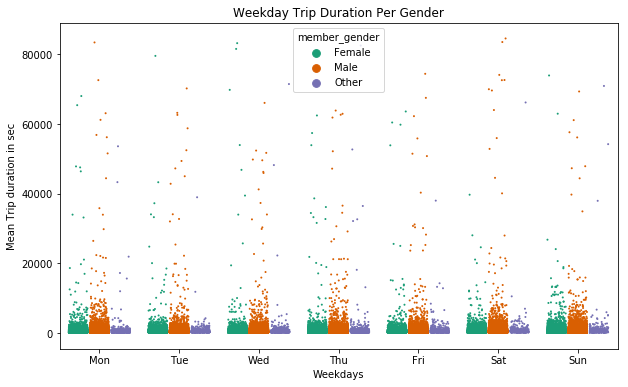

In [37]:
#14. Weekday trip duration per gender
plt.figure(figsize=[10, 6])
sb.stripplot(data = clean_bikeshare, x = 'start_week', y = 'duration_sec', hue = 'member_gender', order=day_order, palette = 'Dark2',
            size=2, jitter=0.35, dodge=True)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

**Observation:** The female gender seems to have longer trip durations on weekdays than the males
<p> It is observed that this visualization is dominated by outliers(the white empty spaces), so I'd be plotting another visualization for the same data with the outliers excluded. </p>

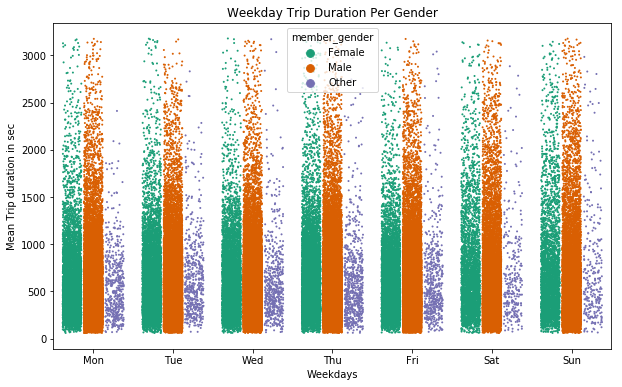

In [38]:
plt.figure(figsize=[10, 6])
sb.stripplot(data = clean_bikeshare.query('duration_sec<duration_sec.quantile(0.99)'), x = 'start_week', y = 'duration_sec', hue = 'member_gender', order=day_order, palette = 'Dark2',
            size=2, jitter=0.35, dodge=True)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

Question: How does the average trip duration vary in weekdays between customers and subscribers?

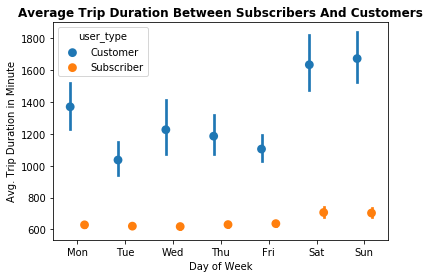

In [39]:
#15. average trip duration between subscribers and customers for each day of the week
sb.pointplot(data=clean_bikeshare, x='start_week', y='duration_sec', hue='user_type', dodge=0.3, linestyles="", order=day_order);
plt.title('Average trip duration between subscribers and customers'.title(), weight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.show()

From the plot above, it can be observed that every day of the week, subscribers have shorter trips than customers but during the weekends (saturday and sunday) the duration of both user types tend to increase. Subscribers maintained a consistent trip duration from monday to friday

**Question** What age group have longer trip durations on weekdays?

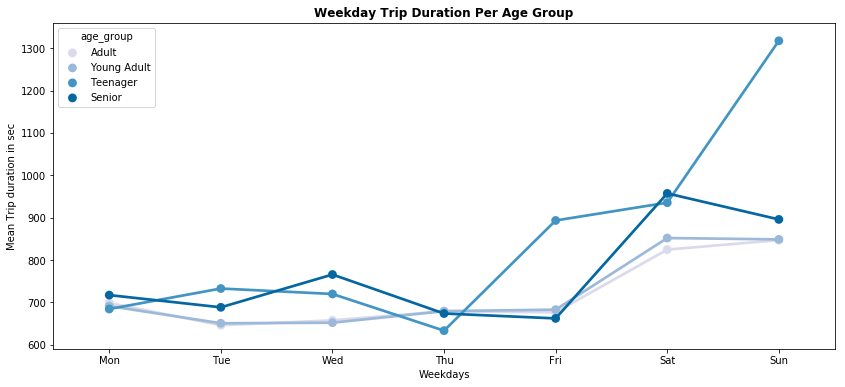

In [40]:
#16. Weekday trip duration per age group
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14, 6])
sb.pointplot(data = clean_bikeshare, x = 'start_week', y = 'duration_sec', hue = 'age_group', order=day_order, palette = 'PuBu', ci=None)
plt.title('Weekday Trip Duration Per Age Group'.title(), weight='bold')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

from the plot above, the teenagers seem to have longer trip durations during the weekends than other age groups. During the weekdays, the trip duration varies between all age groups.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yeah, I could observed that when I did the age grouping, I could get more insight on the ages of the members The adult seems to have the highest trip while the teenagers as expected had the least trip

### Were there any interesting or surprising interactions between features?

> I was surprised to see that the female gender had more trip during the week day than the male gender

## Conclusions
<ul> 
    <li>In my project, I used the fordgo bikeshare 2019 dataset.</li>
<li>Though, the dataset looked clean, but based on some of my analysis, I needed to still do some cleaning and remove outliers.</li>
    <li>I could observe that the members ages are below age 60</li>
<li>male gender tends to use the bikeshare service more than the female gender and any other gender</li>
<li>it is observed that the highest trips happens to be between 8 am in the morning and 5pm in the evening.</li>
    <li>it can be seen that subscriber users are more than the customers.</li>

